In [6]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import torch

import os
import sys
sys.path.append('..')

from utils.train_utils import model_selected
from multi_train import convert_multi_gpu_checkpoint_to_single_gpu

In [7]:
# Initial Model.
ckpt_fpath = '/data/home/waitma/antibody_proj/antidiff/checkpoints/390.pt'
ckpt = torch.load(ckpt_fpath, map_location='cpu')
config = ckpt['config']
model = model_selected(config)
ckpt_model = convert_multi_gpu_checkpoint_to_single_gpu(ckpt)
model.load_state_dict(ckpt_model)

<All keys matched successfully>

In [16]:
emb_param = [param for param in model.aa_encoder.embedder.parameters()][0]
emb_param

Parameter containing:
tensor([[ 3.6836e-01, -2.5873e-01,  4.9195e-01,  7.7984e-01, -4.4613e-01,
          1.2917e+00,  2.2990e-01, -6.2819e-01],
        [ 7.5263e-01,  1.1619e+00, -1.7571e+00,  5.0869e-01, -7.2351e-01,
         -2.0333e+00,  5.6417e-01, -3.2476e-01],
        [ 4.4466e-01, -1.0329e+00, -1.9187e-01,  2.2211e-01, -1.1189e+00,
          2.1631e-01, -7.0630e-01, -5.8163e-01],
        [ 9.5000e-03, -1.7276e+00, -6.9517e-01,  1.2848e-01,  9.5866e-01,
         -7.7851e-01, -3.5585e-02, -1.2159e-01],
        [-7.1358e-01,  1.0571e+00,  2.0701e-01, -2.5293e-01,  2.6436e-01,
          6.4196e-01, -3.8035e-01, -1.0518e+00],
        [-6.6675e-01, -1.9409e-01,  1.7017e-01, -1.1059e+00,  4.3616e-02,
         -5.7126e-02,  1.7714e-02, -7.8183e-01],
        [ 1.7231e-01, -1.2169e+00,  1.2501e-01,  2.1643e+00, -6.6780e-01,
         -1.8561e+00, -2.1384e-01, -1.5026e+00],
        [-2.2359e-01, -4.9567e-01,  1.2165e+00, -4.2836e-01, -5.6979e-01,
         -2.7466e-02,  2.5317e-01,  1.3439e

In [17]:
# Convert PyTorch tensor to numpy array if necessary
if isinstance(emb_param, torch.Tensor):
    hidden_features = emb_param.detach().numpy()

In [25]:
RESD_MAP_1TO3 = {
    'A': 'ALA',
    'R': 'ARG',
    'N': 'ASN',
    'D': 'ASP',
    'C': 'CYS',
    'Q': 'GLN',
    'E': 'GLU',
    'G': 'GLY',
    'H': 'HIS',
    'I': 'ILE',
    'L': 'LEU',
    'K': 'LYS',
    'M': 'MET',
    'F': 'PHE',
    'P': 'PRO',
    'S': 'SER',
    'T': 'THR',
    'W': 'TRP',
    'Y': 'TYR',
    'V': 'VAL',
}
RESD_NAMES_1C = sorted(list(RESD_MAP_1TO3.keys()))
RESD_WITH_X = RESD_NAMES_1C + ['X']
RESD_TOKEN = RESD_WITH_X + ['-', '<msk>']

In [28]:
hidden_features_2d.shape

(23, 2)

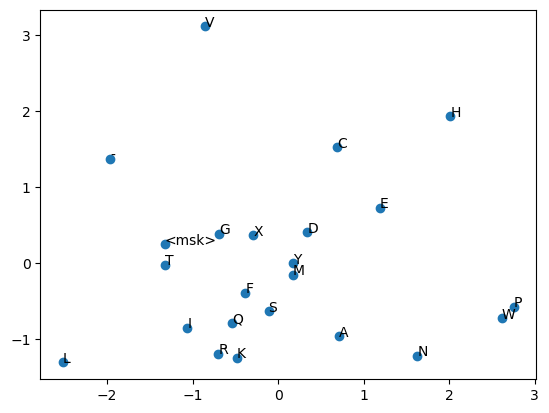

In [31]:
pca = PCA(n_components=2)
hidden_features_2d = pca.fit_transform(hidden_features)
plt.scatter(hidden_features_2d[:, 0], hidden_features_2d[:, 1])
for i, category in enumerate(RESD_TOKEN):
    plt.annotate(category, (hidden_features_2d[i, 0], hidden_features_2d[i, 1]))
plt.show()